In [1]:
import pymc as pm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import arviz as az

In [2]:
%config InlineBackend.figure_format = 'retina'
# Initialize random number generator
RANDOM_SEED = 8927
np.random.seed(RANDOM_SEED)
az.style.use("arviz-darkgrid")

In [3]:
pymc_data = pd.read_csv('pymc_data.csv')
pymc_data.loc[pymc_data["outcome"] == 1, "outcome"] = 'active antagonist'
pymc_data.loc[pymc_data["outcome"] == 0, "outcome"] = 'inactive'

In [4]:
test_df = pymc_data.loc[100:299,:]

In [5]:
test_df.ProtocolName.value_counts()

tox21-erb-bla-p1               100
tox21-gh3-tre-antagonist-p1    100
Name: ProtocolName, dtype: int64

In [6]:
test_df.Organism.value_counts()

Human          100
Animal cell    100
Name: Organism, dtype: int64

In [7]:
test_df

,Unnamed: 0,BCUT2D_CHGHI,BCUT2D_MRLOW,Chi0,Chi0n,Chi1,Chi1v,Chi2v,Chi3v,EState_VSA3,...,fr_nitro_arom,fr_phenol,fr_phenol_noOrthoHbond,fr_unbrch_alkane,outcome,Tissue_Type4,Cell_Type,Gender,Organism,Tissue_Type2
100,300,2.080031,-0.136469,13.664926,10.374076,9.164704,6.071013,4.260291,2.879925,5.563451,...,0,0,0,0,inactive,Normal,epithelial,F,Human,kidney
101,301,2.277038,-0.118663,4.568914,3.178304,2.804530,1.714100,1.224344,0.650672,6.606882,...,0,0,0,0,inactive,Normal,epithelial,F,Human,kidney
102,302,1.815537,0.474948,5.983128,4.756615,3.787694,2.544974,1.835549,1.033971,5.749512,...,0,1,1,0,inactive,Normal,epithelial,F,Human,kidney
103,303,1.903096,1.301255,6.690234,5.394472,4.342535,3.482687,2.327376,1.693156,5.880003,...,0,0,0,0,inactive,Normal,epithelial,F,Human,kidney
104,304,2.123351,0.483334,9.353371,6.481360,5.409702,4.686804,3.906306,2.356340,0.000000,...,0,0,0,0,inactive,Normal,epithelial,F,Human,kidney
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,595,2.106270,-0.401940,19.104084,12.987283,12.346244,6.872630,4.595038,2.727257,0.000000,...,0,0,0,0,active antagonist,Primary,epithelial,F,Animal cell,pituitary gland
296,596,2.599266,-0.313088,33.388176,28.694025,21.756712,16.840958,14.507601,10.141912,42.747402,...,0,0,0,0,active antagonist,Primary,epithelial,F,Animal cell,pituitary gland
297,597,2.128752,-0.890356,17.227922,17.553100,11.121320,10.941096,8.332693,5.233990,0.000000,...,0,0,0,12,active antagonist,Primary,epithelial,F,Animal cell,pituitary gland
298,598,2.117401,1.129662,19.388541,16.769844,12.990402,9.120990,7.028083,4.758934,0.000000,...,0,0,0,0,active antagonist,Primary,epithelial,F,Animal cell,pituitary gland


## Mathematical notation of the multi-level model
$$ Y \sim Bernoulli(\mathcal{p})$$
$$ \mathcal{p} = g^{-1}(X\beta_{prot})$$
$$\beta_{prot} \sim MvNormal(\mu_{prot},\Sigma)$$
$$\mu_{prot} = \gamma_0 + \gamma_1 * organism + \epsilon$$
$$\gamma_{i} \sim N(0,\sigma^{2}_{\gamma})$$
$$\epsilon \sim N(0,\sigma^{2}_{\epsilon})$$


In [46]:
import math
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,LabelBinarizer
# True parameter values - gamma
intercept, sigma = 1, 1
beta_prot = [1, 2.5, 5, 0.8]

sig_gamma = 1
sig_e = 1

u1 = 

# Size of dataset
size = 400

# Predictor variable
# descriptors
# X1 = pymc_data.BCUT2D_CHGHI.values
# X2 = pymc_data.Chi0.values
# X3 = pymc_data.EState_VSA3.values
scaler = StandardScaler()
X1 = scaler.fit_transform(pymc_data[['BCUT2D_CHGHI']])
X2 = scaler.fit_transform(pymc_data[['Chi0']])
X3 = scaler.fit_transform(pymc_data[['EState_VSA3']])
# assay-info
organism = pymc_data.Organism
# X1 = np.random.randn(size)
# X2 = np.random.randn(size) * 0.2

# Simulate outcome variable
# Y = alpha + beta[0] * X1 + beta[1] * X2 + np.random.randn(size) * sigma
error = np.random.randn(size) * sigma
p = intercept + beta_prot[0] *X1 + beta_prot[1] *X2 + beta_prot[2]*X3 + error
# print(p)
# ps = 1 / (1 + math.exp(-p[0]))
ps = [1 / (1 + math.exp(-i)) for i in p[0]]
Y = np.random.binomial(500, ps, size)
# gamma_i = np.random.randn(size)
# u_prot = gamma + 

In [47]:
Y # should be 0 & 1

array([ 26,  27,  11,   9,   1,  12,  25,  19,   1,  15,   3,  20,   3,
        18,   2,   2,   6,   5,  13,  27,  25,   6,  15,   6,  23,  13,
         5,   7,   3,  13,   9,   5,   5,  45,  24,   4,  52,  31,   3,
         6,  11,  23,  50,   1,   7,   5,   0,   9,   3,   8,   3,  11,
        12,   2,  13,   7,  12,  22,   8,   3,   3,  14,  22,   7,   1,
        10,  47,   4,   2,   7,  22,   4,   6,   9,   3,   8,   1,  15,
         8,   2,  12,   0,   4,   3,  33,   1,   7,   7,   3,  13,   3,
         3,   7,   6,  26,  23,  25,   6,  22,   5,  20,   0,  13,   6,
        12,   0,  14,   4,   3,  12,   6,   4,  18,   7,   8,   6,   4,
        42,   6,   2,   3,   7,  16,   7,  15,   2,   1,   7,  35,  15,
        13,   9, 105,   1,   5,  15,   6,  10,  19,   3,   2,   4,  11,
        10,  17,  10,  16,   0,   7,  11,   2,   5,   5,   7, 152,   5,
         3,   9,   6,  18,   0,  14,  14,   1,   4,  20,  11,   4,   1,
         6,  10,  56,  44,   7,   7,   4,  38,   9,   4,  34,   

In [23]:
# original
simulated_protocols = pd.factorize(pymc_data.ProtocolName)
#To busy to figure out the right way to do this
X4_bayes = pymc_data[['BCUT2D_CHGHI', 'Chi0', 'EState_VSA3']]
# X4_bayes = pymc_data.iloc[:,:20]
X4_bayes.insert(0,'Intercept',1)
print(X4_bayes)
X4_bayes = np.asarray(X4_bayes)
Y4_bayes = pd.factorize(pymc_data.outcome)
proto_name = ['tox21-ar-bla-antagonist-p1', 'tox21-gh3-tre-antagonist-p1', 'tox21-ahr-p1', 'tox21-erb-bla-p1']
coords_simulated = {
    'obs_id': np.arange(X4_bayes.shape[0]),
    'protocol':simulated_protocols[1],
    
    'params':['beta_{0}'.format(i) for i in range(X4_bayes.shape[1])]
}
coords_simulated

     Intercept  BCUT2D_CHGHI       Chi0  EState_VSA3
0            1      2.078754  13.363597     0.000000
1            1      2.255721   6.853371    12.841643
2            1      2.114966  11.966255     0.000000
3            1      2.061405   5.112884    13.027704
4            1      2.131712  13.828063    11.312963
..         ...           ...        ...          ...
395          1      1.801405   5.983128     0.000000
396          1      2.392932  20.148054    24.443417
397          1      2.099693  13.689870     0.000000
398          1      2.196300  20.924074    17.130841
399          1      2.553037  89.381682   121.327341

[400 rows x 4 columns]


{'obs_id': array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175

In [28]:
X4_bayes.shape

(400, 4)

In [49]:
X4 = pd.DataFrame([intercept]*400)
X4['X1'] = X1
X4['X2'] = X2
X4['X3'] = X3
np.asarray(X4).shape

(400, 4)

In [50]:
pd.factorize(Y)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  4,  8,  9, 10,  9, 11, 12, 12, 13,
        14, 15,  1,  6, 13,  8, 13, 16, 15, 14, 17,  9, 15,  3, 14, 14, 18,
        19, 20, 21, 22,  9, 13,  2, 16, 23,  4, 17, 14, 24,  3,  9, 25,  9,
         2,  5, 12, 15, 17,  5, 26, 25,  9,  9, 27, 26, 17,  4, 28, 29, 20,
        12, 17, 26, 20, 13,  3,  9, 25,  4,  8, 25, 12,  5, 24, 20,  9, 30,
         4, 17, 17,  9, 15,  9,  9, 17, 13,  0, 16,  6, 13, 26, 14, 10, 24,
        15, 13,  5, 24, 27, 20,  9,  5, 13, 20, 11, 17, 25, 13, 20, 31, 13,
        12,  9, 17, 32, 17,  8, 12,  4, 17, 33,  8, 15,  3, 34,  4, 14,  8,
        13, 28,  7,  9, 12, 20,  2, 28, 35, 28, 32, 24, 17,  2, 12, 14, 14,
        17, 36, 14,  9,  3, 13, 11, 24, 27, 27,  4, 20, 10,  2, 20,  4, 13,
        28, 37, 38, 17, 17, 20, 39,  3, 20, 40,  9, 20, 24, 31, 32,  3,  9,
         0, 20, 14,  9, 35, 27, 25,  9, 13,  0, 13, 17, 41, 32, 14,  9,  9,
        20, 30, 16, 32, 33, 42,  3, 35, 24,  4, 12,  3, 40,  7,  3,  5, 20,
         3, 

In [51]:
simulated_protocols = pd.factorize(pymc_data.ProtocolName)
#Simulated
X4_bayes = np.asarray(X4)
Y4_bayes = pd.factorize(Y)
proto_name = ['tox21-ar-bla-antagonist-p1', 'tox21-gh3-tre-antagonist-p1', 'tox21-ahr-p1', 'tox21-erb-bla-p1']
coords_simulated = {
    'obs_id': np.arange(X4_bayes.shape[0]),
    'protocol':simulated_protocols[1],
    
    'params':['beta_{0}'.format(i) for i in range(X4_bayes.shape[1])]
}
coords_simulated

{'obs_id': array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175

In [65]:
simulated_protocols

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [62]:
organisms = [0,0,1,1]
import aesara.tensor as T
#https://docs.pymc.io/en/v3/pymc-examples/examples/case_studies/multilevel_modeling.html
with pm.Model(coords=coords_simulated) as assay_level_model:
    protocol_idx = pm.Data("protocol_idx", list(simulated_protocols[0]),dims='obs_id')
    organism_idx = pm.Data("organism_idx", organisms, dims="protocol")
#     tissue_idx = pm.Data('tissue_idx', tissues, dims='protocol')
    
    # prior stddev in intercepts & slopes (variation across protocol):
    sd_dist = pm.Exponential.dist(1)
    
    # get back standard deviations and rho:
    chol, corr, stds = pm.LKJCholeskyCov("chol", n=X4_bayes.shape[1], eta=2.0, sd_dist=sd_dist, compute_corr=True)
    
    #hyperpriors and priors for average betas:
    beta_list = []
    for i in range(X4_bayes.shape[1]):
        gbeta = pm.Normal("g_beta_{0}".format(i), mu=0.0, sigma=10.0, shape=2)
        mu_gbeta = gbeta[0] + gbeta[1] * organism_idx
#         + gbeta[2] * tissue_idx
        beta_list.append(pm.Normal('beta_{0}'.format(i), mu=mu_gbeta,sigma=3.0,dims="protocol"))
    
    #population of varying protocol effects:
    beta_protocol = pm.MvNormal("beta_protocol", mu=T.stack(beta_list, axis=1), chol=chol,dims=('protocol', 'params'))
    
    #Expected value per protocol:
    theta = beta_protocol[protocol_idx,0]* X4_bayes[:,0]
#     print(theta)
    for i in range(1,X4_bayes.shape[1]):
        theta += beta_protocol[protocol_idx,i] * X4_bayes[:,i]
        print(theta)

    p = 1.0 / (1.0 + T.exp(-theta ))
    likelihood = pm.Bernoulli('likelihood', p, observed=Y4_bayes[0],dims="obs_id")

/opt/anaconda3/lib/python3.9/site-packages/pymc/data.py:647: FutureWarning: The `mutable` kwarg was not specified. Currently it defaults to `pm.Data(mutable=True)`, which is equivalent to using `pm.MutableData()`. In v4.1.0 the default will change to `pm.Data(mutable=False)`, equivalent to `pm.ConstantData`. Set `pm.Data(..., mutable=False/True)`, or use `pm.ConstantData`/`pm.MutableData`.
  warnings.warn(


Elemwise{add,no_inplace}.0
Elemwise{add,no_inplace}.0
Elemwise{add,no_inplace}.0


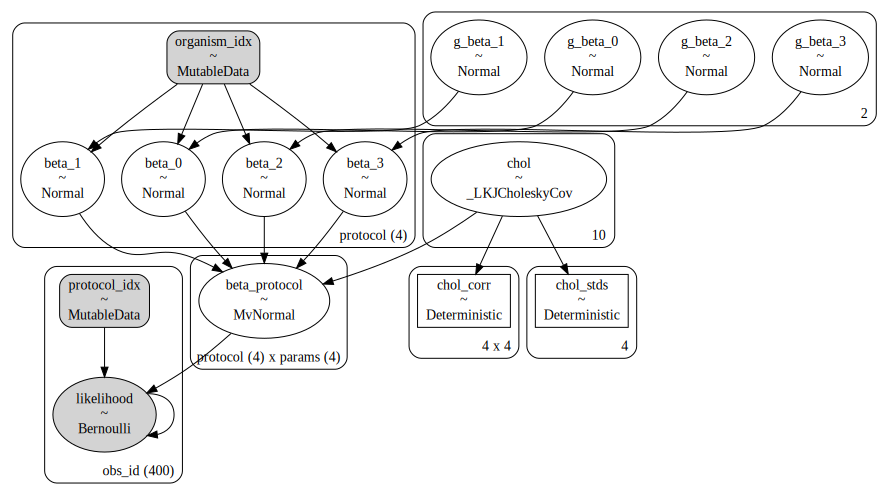

In [63]:
pm.model_to_graphviz(assay_level_model)

In [64]:
with assay_level_model:
    tr_assay = pm.sample(500, tune=500, init="adapt_diag",chains=4,cores=8)


/opt/anaconda3/lib/python3.9/site-packages/pymc/aesaraf.py:1005: UserWarning: The parameter 'updates' of aesara.function() expects an OrderedDict, got <class 'dict'>. Using a standard dictionary here results in non-deterministic behavior. You should use an OrderedDict if you are using Python 2.7 (collections.OrderedDict for older python), or use a list of (shared, update) pairs. Do not just convert your dictionary to this type before the call as the conversion will still be non-deterministic.
  aesara_function = aesara.function(
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...


SamplingError: Initial evaluation of model at starting point failed!
Starting values:
{'chol_cholesky-cov-packed__': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'g_beta_0': array([0., 0.]), 'beta_0': array([0., 0., 0., 0.]), 'g_beta_1': array([0., 0.]), 'beta_1': array([0., 0., 0., 0.]), 'g_beta_2': array([0., 0.]), 'beta_2': array([0., 0., 0., 0.]), 'g_beta_3': array([0., 0.]), 'beta_3': array([0., 0., 0., 0.]), 'beta_protocol': array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])}

Initial evaluation results:
{'chol': -3.19, 'g_beta_0': -6.44, 'beta_0': -8.07, 'g_beta_1': -6.44, 'beta_1': -8.07, 'g_beta_2': -6.44, 'beta_2': -8.07, 'g_beta_3': -6.44, 'beta_3': -8.07, 'beta_protocol': -14.7, 'likelihood': -inf}